In [65]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
import numpy as np

#images -> feature values
#number of feature values is n -> need n qubits
#for now will generate feature values randomly, using n = 100. 
f = np.random.rand(1,4)
fmax = f.max()

def theta(i):
    return (np.pi/4)*(f[0,i]/fmax)
#in algorithm 1 part of the paper, this formula is described to calculate angle of rotation for RY gates

n = len(f[0])
#defining n as length of features- for easier transition to actual feature value dataset

None


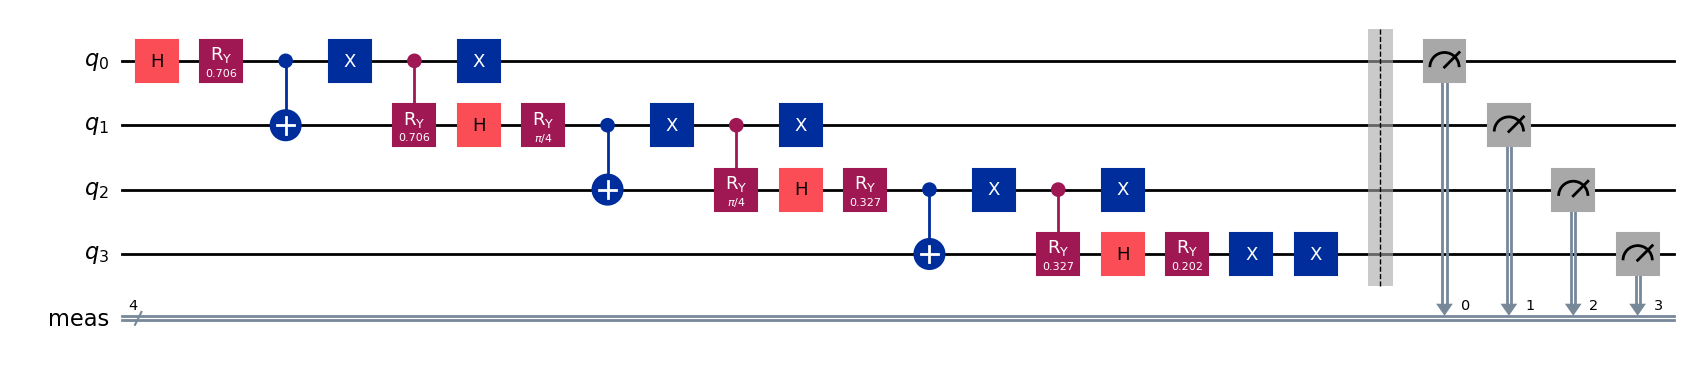

In [75]:
# Create a new circuit with two qubits
qc = QuantumCircuit(n)

#in qiskit, qubits are automatically initialized to 0
for i in range(n):
    qc.h(i) #add hadamard gate to all lines
    #qc.h(qubit its on)
    qc.ry(theta(i),i) #add ry gate with theta func
    #qc.h(angle, qubit its on)
    if i<n-1:
        qc.cx(i,i+1) #controlled not gate (CNOT) 
        #qc.cx(from, to)
    qc.x(i)
    #qc.x(qubit its on)
    if i<n-1: 
        qc.cry(theta(i),i,i+1)
        #qc.cry(angle, from, to)
    qc.x(i)

output = qc.measure_all()
print(output)
qc.draw("mpl")
#draws the circuit